# Facial Expression Recognition

## Initialisation

In [9]:
!pip install fastai
from fastai.vision.all import *
from fastai.vision.widgets import *

# Define the path
path = Path("/kaggle/input/affectnet-yolo/DATA/train/images")
label_path = Path("/kaggle/input/affectnet-yolo/DATA/train/labels")
model_dir = '/kaggle/working/models'

# Map numbers to labels
expressions = ['anger', 'contempt', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

## Prepare labels

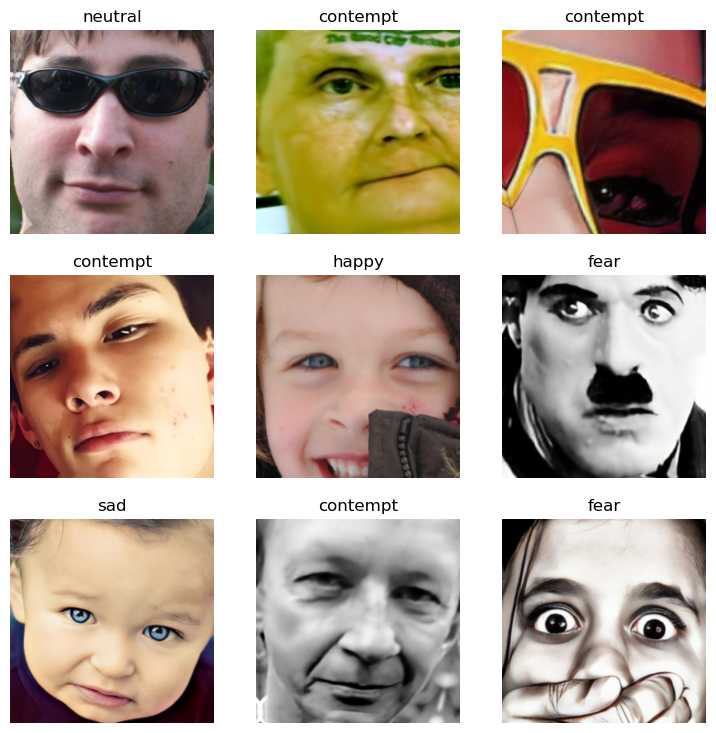

In [2]:
# Create a dictionary of labels
labels_dict = {}
for txt_file in label_path.glob('*.txt'):
    with open(txt_file) as f:
        content = f.read().strip().split()
        label_index = int(content[0]) # Assuming the class is the first element in the file
        label = expressions[label_index]
        filename = txt_file.stem # Filename without extension
        labels_dict[filename] = label

# Define the labeling function
def label_func(filepath):
    filename = filepath.stem
    return labels_dict.get(filename, 'unknown') # Return 'unknown' if the filename is not found in the dictionary

# Gather the file paths
files = get_image_files(path)

# Define any data augmentation or preprocessing
item_tfms = Resize(224)
batch_tfms = aug_transforms(size=224)

# Create the ImageDataLoaders object
faces = ImageDataLoaders.from_path_func(
    path, files, label_func, 
    item_tfms=item_tfms, 
    #! this will not run on m1 mac
    batch_tfms=batch_tfms
)

faces.show_batch()

## Create and test a learner

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 62.8MB/s]


SuggestedLRs(valley=0.002511886414140463)

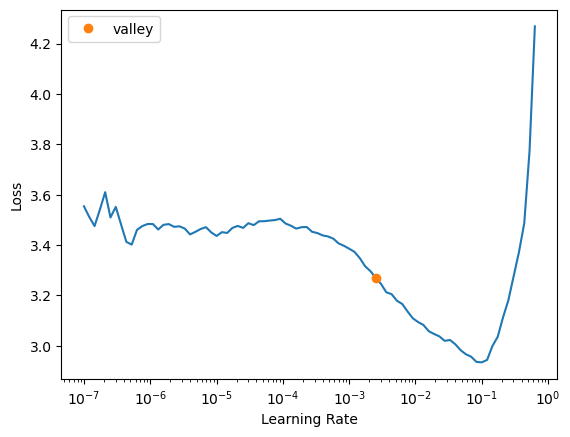

In [3]:
# create a learner
learn = vision_learner(faces, resnet34, metrics=error_rate, model_dir=model_dir)
learn.lr_find() # find the optimal learning rate

epoch,train_loss,valid_loss,error_rate,time
0,1.231488,1.137108,0.426920,10:03


epoch,train_loss,valid_loss,error_rate,time
0,1.010841,0.922122,0.341497,07:00
1,0.799409,0.788335,0.290165,06:58


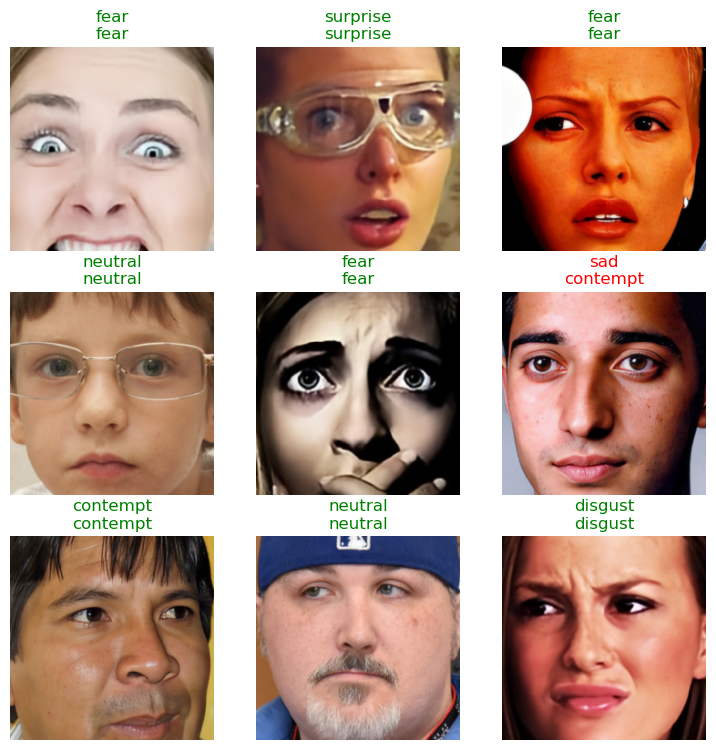

In [5]:
learn.fine_tune(2, 3e-3) # train the model
learn.show_results() # check the results

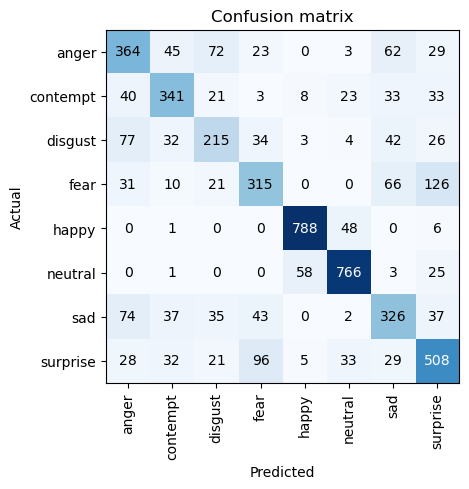

In [6]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

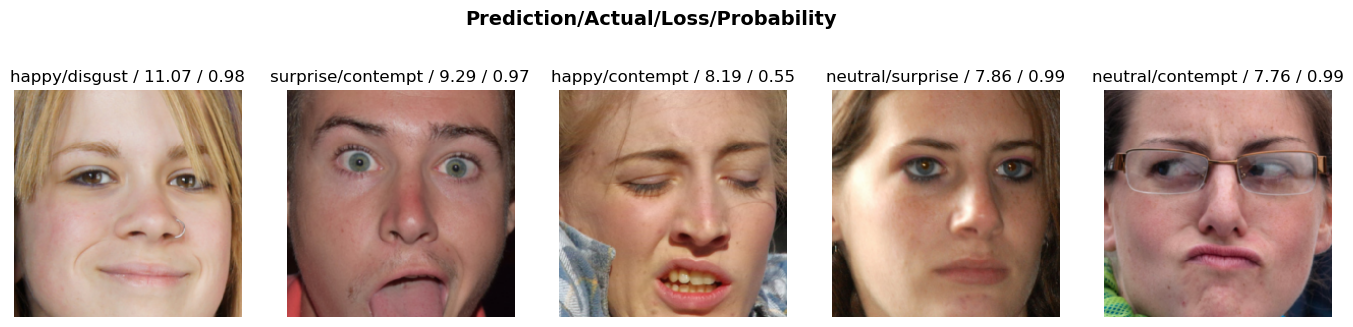

In [7]:
interp.plot_top_losses(5, nrows=1, figsize=(17,4))

In [11]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
# refine
# export the model